# Exercitiu 4 - Tema 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import scipy.signal as sg
import math
import sounddevice as sd
from scipy.ndimage import gaussian_filter
import scipy.signal as signal

In [2]:
frq, mix = wf.read('data/mega_mix.wav')
_, bass = wf.read('data/ps-lab-3-bass.wav')
_, drums = wf.read('data/ps-lab-3-drums.wav')
_, guitar = wf.read('data/ps-lab-3-guitar.wav')
_, keyboard = wf.read('data/ps-lab-3-keyboard.wav')

time1, time2 = 30, 32
st = time1 * frq; dr = time2 * frq

mix = mix[st:dr]
bass = bass[st:dr]
drums = drums[st:dr]
guitar = guitar[st:dr]
keyboard = keyboard[st:dr]

In [3]:
def transform_to_fft(sound):
    if len(sound.shape) != 1:
        sound = np.average(sound, axis=1)
    # sound = signal.filtfilt(*signal.butter(10, 0.4, btype='low'), sound)
    sound_fft = np.fft.fft(sound)
    sound_fft = np.abs(sound_fft[:len(sound_fft) // 2])
    sound_fft = gaussian_filter(sound_fft, sigma=10)
    # sound_fft = 20 * np.log10(sound_fft)
    return sound_fft[:3000]

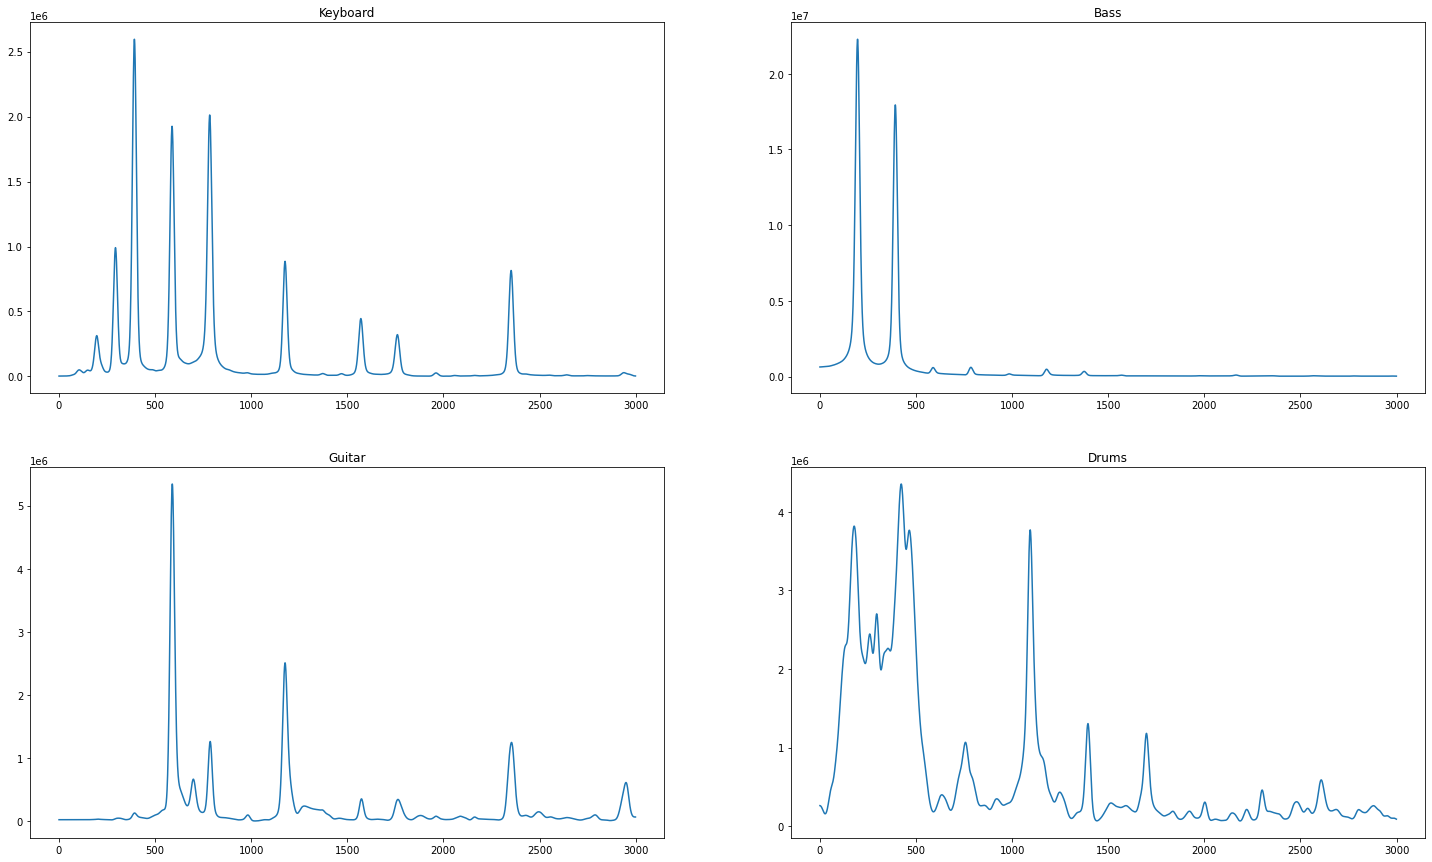

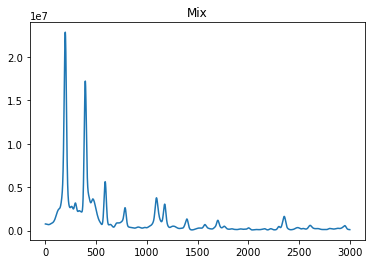

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].plot(transform_to_fft(keyboard))
ax[0][0].set_title("Keyboard")

ax[0][1].plot(transform_to_fft(bass))
ax[0][1].set_title("Bass")

ax[1][0].plot(transform_to_fft(guitar))
ax[1][0].set_title("Guitar")

ax[1][1].plot(transform_to_fft(drums))
ax[1][1].set_title("Drums")

fig.set_figwidth(25)
fig.set_figheight(15)

plt.show()

plt.plot(transform_to_fft(mix))
plt.title("Mix")
plt.show()

In [5]:
def elimitate_frequency(sound):
    if len(sound.shape) != 1:
        sound = np.average(sound, axis=1)
    sound_fft = np.fft.fft(sound)
    sound_fft = sound_fft[:len(sound_fft) // 2]
    sound_fft[175:225] = 0.
    sound_fft[370:425] = 0.
    # sound_fft[len(sound_fft) - dr : len(sound_fft) - st] = 0.

    return np.abs(np.fft.ifft(sound_fft))

In [6]:
mix_no_guitar = elimitate_frequency(mix)

In [7]:
sd.default.samplerate = frq
print("keyboard", flush=True)
wav_wave = np.array(keyboard, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

print("bass", flush=True)
wav_wave = np.array(bass, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

print("guitar", flush=True)
wav_wave = np.array(guitar, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

print("drums", flush=True)
wav_wave = np.array(drums, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

keyboard
bass
guitar
drums


In [8]:
# ascultam inainte si dupa sa scoatem instrumentul

sd.default.samplerate = frq
print("mix", flush=True)
wav_wave = np.array(mix, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

sd.default.samplerate = frq // 2
print("mix no guitar", flush=True)
wav_wave = np.array(mix_no_guitar, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

mix
mix no guitar
